In [201]:
import acquire
import prepare

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [202]:
df = acquire.get_titanic_data()
df = prepare.handle_missing_values(df)

In [203]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [204]:
df.fare.value_counts(bins=10, sort=False)

(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
Name: fare, dtype: int64

In [205]:
df = df.dropna()

1. Fit the logistic regression classifier to your training sample and transform, i.e. make predictions on the training sample

In [206]:
X = df[['pclass','age','fare','sibsp','parch',]]
y = df[['survived']]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [208]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train[['age', 'fare']])

array([[0.17804755, 0.41250333],
       [0.75973698, 0.06538765],
       [0.30450177, 0.01493181],
       [0.59534648, 0.10149724],
       [0.45624684, 0.1036443 ],
       [0.64592817, 0.05953204],
       [0.60799191, 0.21642979],
       [0.59534648, 0.14976542],
       [0.48153768, 0.15546645],
       [0.64592817, 0.15276642],
       [0.21598381, 0.51212189],
       [0.22862924, 0.51334181],
       [0.62063733, 0.05604307],
       [0.70915529, 0.02049464],
       [0.44360142, 0.05150497],
       [0.69650986, 0.05991421],
       [0.01365706, 0.02042144],
       [0.46889226, 0.13913574],
       [0.69650986, 0.06929139],
       [0.36772888, 0.16883676],
       [0.32979262, 0.02049464],
       [0.43095599, 0.16293235],
       [0.29185635, 0.16231419],
       [0.60799191, 0.05061043],
       [0.64592817, 0.15546645],
       [0.41831057, 0.02537431],
       [0.8861912 , 0.06764049],
       [0.44360142, 0.15390495],
       [0.19069297, 0.11316786],
       [0.74709155, 0.14687822],
       [0.

In [209]:
scaler = MinMaxScaler()
scaler.fit(train[['age', 'fare']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [210]:
train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [211]:
train[['age', 'fare']].head(10)

,age,fare
148,0.507705,0.050749
62,0.628995,0.162932
662,0.657534,0.049943
370,0.343607,0.108215
484,0.343607,0.177775
871,0.657534,0.102579
782,0.400685,0.058556
195,0.814498,0.285990
689,0.200913,0.412503
473,0.315068,0.026920


## Logistic Regression (_titanic data_)

4. Look in the scikit-learn documentation to research the solver parameter. What is your best option(s) for the particular problem you are trying to solve and the data to be used?
    - _newton-cg_ is the best solver to use because this is a small data set, whereas ‘sag’ and ‘saga’ are faster for large data sets
    - it gave the best logit.sore with 73% of the predictions correct


5. Run through steps 2-4 using another solver (from question 5)

In [222]:
logit = LogisticRegression(solver='newton-cg')

7. Save the best model in logit_fit

In [223]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [224]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

6. Which performs better on your in-sample data?

In [225]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.73


In [226]:
confusion_matrix(y_train, y_pred)

array([[11, 31],
       [ 3, 83]])

In [227]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39        42
           1       0.73      0.97      0.83        86

   micro avg       0.73      0.73      0.73       128
   macro avg       0.76      0.61      0.61       128
weighted avg       0.75      0.73      0.69       128



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Text(0.5, 1.0, 'Confusion Matrix')

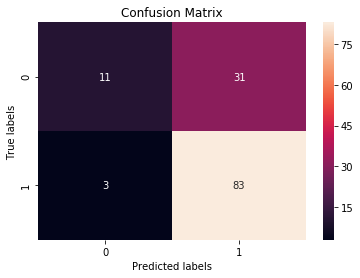

In [228]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

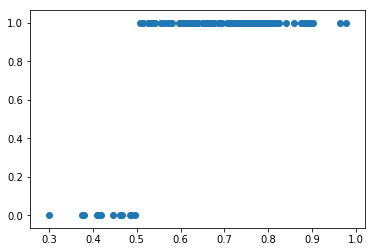

In [229]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

## Decision Tree (_iris data_)

In [235]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

In [238]:
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [262]:
X = df_iris.drop(['species'],axis=1)
y = df_iris[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [263]:
train.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [272]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [273]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [274]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([2, 2, 1, 0, 0])

In [275]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [276]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [277]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [278]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.98        40
           2       1.00      0.94      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Text(0.5, 1.0, 'Confusion Matrix')

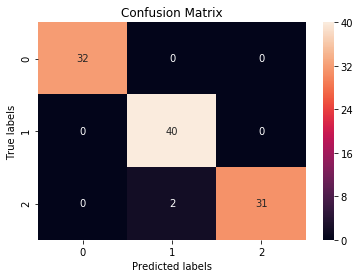

In [279]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

4. Run through steps 2-4 using entropy as your measure of impurity.

5. Which performs better on your in-sample data?
    - _

6. Save the best model in tree_fit